# Lab | Cleaning numerical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.
Context

An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

Some business Objectives:

    Retain customers,
    Analyze relevant customer data,
    Develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.
Instructions

    1 Import the necessary libraries.
    2 Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.
    3 First look at its main features (head, shape, info).
    4 Rename the columns so they follow the PE8 (snake case).
    5 Change effective to date column to datetime format.
    6 Check NaN values per column.
    7 Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.
    8 For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.
    9 Get categorical features.
    10 What should we do with the customer_id column?


## Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

## Load the .csv file into the variable customer_df.

In [2]:
customer_df = pd.read_csv(r"C:/Users/josefin/01_IRONHACK/Week4/Day4.1/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")

## First look at its main features.

head, shape, info

In [3]:
customer_df.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income Location Code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy Renew Offer Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

## Rename the columns so they follow the PE8.

PE8 = snake case

In [6]:
#customer_df.columns = customer_df.columns.str.replace(' ', '_')
#customer_df.columns = customer_df.columns.str.lower()

In [7]:
new_columns = []
for i in customer_df.columns:
    i =  i.replace(' ','_').lower()
    new_columns.append(i)
customer_df.columns = new_columns

In [8]:
customer_df.head()

customer       state  customer_lifetime_value response  coverage education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  effective_to_date employmentstatus gender  income location_code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   

  marital_status  monthly_premium_auto  months_since_last_claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   months_since_policy_inception  number_of_open_complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   number_of_policies     policy_type        policy renew_offer_type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  sales_channel  total_claim_amount  vehicle_class vehicle_size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

In [9]:
customer_df = customer_df.rename(columns={'employmentstatus':'employment_status'})

In [10]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

## Change effective to date column to datetime format.

In [11]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')

In [12]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

## Check NaN values per column.

In [13]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [14]:
customer_df.isin(['', ' ']).sum()
#alternative: customer_df[customer_df == ' '].any()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

## What should we do with the customer_id column?

In [15]:
customer_df = customer_df.rename(columns={'customer':'customer_id'})

In [16]:
#set customer_id as the index
customer_df = customer_df.set_index("customer_id")
customer_df.head()

state  customer_lifetime_value response  coverage education  \
customer_id                                                                     
BU79786      Washington              2763.519279       No     Basic  Bachelor   
QZ44356         Arizona              6979.535903       No  Extended  Bachelor   
AI49188          Nevada             12887.431650       No   Premium  Bachelor   
WW63253      California              7645.861827       No     Basic  Bachelor   
HB64268      Washington              2813.692575       No     Basic  Bachelor   

            effective_to_date employment_status gender  income location_code  \
customer_id                                                                    
BU79786            2011-02-24          Employed      F   56274      Suburban   
QZ44356            2011-01-31        Unemployed      F       0      Suburban   
AI49188            2011-02-19          Employed      F   48767      Suburban   
WW63253            2011-01-20        Unemployed      M       0      Suburban   
HB64268            2011-02-03          Employed      M   43836         Rural   

            marital_status  monthly_premium_auto  months_since_last_claim  \
customer_id                                                                 
BU79786            Married                    69                       32   
QZ44356             Single                    94                       13   
AI49188            Married                   108                       18   
WW63253            Married                   106                       18   
HB64268             Single                    73                       12   

             months_since_policy_inception  number_of_open_complaints  \
customer_id                                                             
BU79786                                  5                          0   
QZ44356                                 42                          0   
AI49188                                 38                          0   
WW63253                                 65                          0   
HB64268                                 44                          0   

             number_of_policies     policy_type        policy  \
customer_id                                                     
BU79786                       1  Corporate Auto  Corporate L3   
QZ44356                       8   Personal Auto   Personal L3   
AI49188                       2   Personal Auto   Personal L3   
WW63253                       7  Corporate Auto  Corporate L2   
HB64268                       1   Personal Auto   Personal L1   

            renew_offer_type sales_channel  total_claim_amount  vehicle_class  \
customer_id                                                                     
BU79786               Offer1         Agent          384.811147   Two-Door Car   
QZ44356               Offer3         Agent         1131.464935  Four-Door Car   
AI49188               Offer1         Agent          566.472247   Two-Door Car   
WW63253               Offer1   Call Center          529.881344            SUV   
HB64268               Offer1         Agent          138.130879  Four-Door Car   

            vehicle_size  
customer_id               
BU79786          Medsize  
QZ44356          Medsize  
AI49188          Medsize  
WW63253          Medsize  
HB64268          Medsize

## Define a function that differentiates between continuous and discrete variables. 

Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

    A continuous variable can occupy any value over a continuous range.
    Continuous data is always essentially numeric.
    
    A discrete variable can only take particular values. 
    Each number is distinct and there's no grey area in between. 
    Discrete data can be numeric (e.g. numbers of apples) but it can also be categorical (e.g. red or blue, or male or female, or good or bad).

In [17]:
for i in customer_df.columns.tolist():         
    print(i, len(customer_df[i].unique()))

state 5
customer_lifetime_value 8041
response 2
coverage 3
education 5
effective_to_date 59
employment_status 5
gender 2
income 5694
location_code 3
marital_status 3
monthly_premium_auto 202
months_since_last_claim 36
months_since_policy_inception 100
number_of_open_complaints 6
number_of_policies 9
policy_type 3
policy 9
renew_offer_type 4
sales_channel 4
total_claim_amount 5106
vehicle_class 6
vehicle_size 3


In [18]:
for i in customer_df:
    print('Catagory: ', i)
    print(customer_df[i].value_counts())
    print('\n')

Catagory:  state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64


Catagory:  customer_lifetime_value
2300.691547     6
6057.072080     6
6005.214792     6
8819.018934     6
4984.618655     6
               ..
12206.892080    1
3728.830130     1
2456.816647     1
2675.029491     1
4491.909095     1
Name: customer_lifetime_value, Length: 8041, dtype: int64


Catagory:  response
No     7826
Yes    1308
Name: response, dtype: int64


Catagory:  coverage
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64


Catagory:  education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64


Catagory:  effective_to_date
2011-01-10    195
2011-01-27    194
2011-02-14    186
2011-01-26    181
2011-01-17    180
2011-01-19    179
2011-01-03    178
2011-01-31    178
2011-01-20    173
2

In [19]:
customer_df['income'] = customer_df['income'].astype(float)
customer_df['monthly_premium_auto'] = customer_df['monthly_premium_auto'].astype(float)    

In [20]:
df_cat = pd.DataFrame()
df_discr = pd.DataFrame()
df_cont = pd.DataFrame()

def diff_concr_discr_cat(x):
    for i in x:
        if customer_df[i].dtype == 'object':
            df_cat[i] = customer_df[i]
        elif customer_df[i].dtype == 'int64':
            df_discr[i] = customer_df[i]
        elif customer_df[i].dtype == 'float64':
            df_cont[i] = customer_df[i]

diff_concr_discr_cat(list(customer_df.columns))

In [21]:
df_cat.nunique()

state                5
response             2
coverage             3
education            5
employment_status    5
gender               2
location_code        3
marital_status       3
policy_type          3
policy               9
renew_offer_type     4
sales_channel        4
vehicle_class        6
vehicle_size         3
dtype: int64

In [22]:
df_discr.nunique()

months_since_last_claim           36
months_since_policy_inception    100
number_of_open_complaints          6
number_of_policies                 9
dtype: int64

In [23]:
df_cont.nunique()

customer_lifetime_value    8041
income                     5694
monthly_premium_auto        202
total_claim_amount         5106
dtype: int64

## For the categorical data, check if there is some kind of text in a variable so we would need to clean it. 

Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

In [24]:
for i in df_cat:
    print('Catagory: ', i)
    print(df_cat[i].value_counts())
    print('\n')

Catagory:  state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64


Catagory:  response
No     7826
Yes    1308
Name: response, dtype: int64


Catagory:  coverage
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64


Catagory:  education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64


Catagory:  employment_status
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64


Catagory:  gender
F    4658
M    4476
Name: gender, dtype: int64


Catagory:  location_code
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64


Catagory:  marital_status
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64


Catagory:  po

In [25]:
#alterantive:

#for column in df_cat:
#    cat_column = df_cat[column]
#    print(column)
#    print(set(cat_column))
#    print('--')

## Get categorical features.

In [26]:
#see above: already done at 1.9

df_cat.head()

state response  coverage education employment_status gender  \
customer_id                                                                     
BU79786      Washington       No     Basic  Bachelor          Employed      F   
QZ44356         Arizona       No  Extended  Bachelor        Unemployed      F   
AI49188          Nevada       No   Premium  Bachelor          Employed      F   
WW63253      California       No     Basic  Bachelor        Unemployed      M   
HB64268      Washington       No     Basic  Bachelor          Employed      M   

            location_code marital_status     policy_type        policy  \
customer_id                                                              
BU79786          Suburban        Married  Corporate Auto  Corporate L3   
QZ44356          Suburban         Single   Personal Auto   Personal L3   
AI49188          Suburban        Married   Personal Auto   Personal L3   
WW63253          Suburban        Married  Corporate Auto  Corporate L2   
HB64268             Rural         Single   Personal Auto   Personal L1   

            renew_offer_type sales_channel  vehicle_class vehicle_size  
customer_id                                                             
BU79786               Offer1         Agent   Two-Door Car      Medsize  
QZ44356               Offer3         Agent  Four-Door Car      Medsize  
AI49188               Offer1         Agent   Two-Door Car      Medsize  
WW63253               Offer1   Call Center            SUV      Medsize  
HB64268               Offer1         Agent  Four-Door Car      Medsize

# Lab | Cleaning categorical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data.
Instructions

    1 Import the necessary libraries if you are starting a new notebook.
    2 Load the continuous and discrete variables into continuous_df and discrete_df variables.
    3 Plot a correlation matrix, what can you see?
    4 Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).
    5 What can you see in the plots?
    6 Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.
    7 Have you found outliers? If you have, what should we do with them?
    8 Check nan values per column.
    9 Define a function that differentiate between continuous and discrete variables. Hint: Number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.
    10 For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.
    11 Get categorical features.
    12 What should we do with the customer id column?


## Plot a correlation matrix. What can you see?

total_claim_amount (continous) and monthly_preium_auto (discrete) have the highest correlation

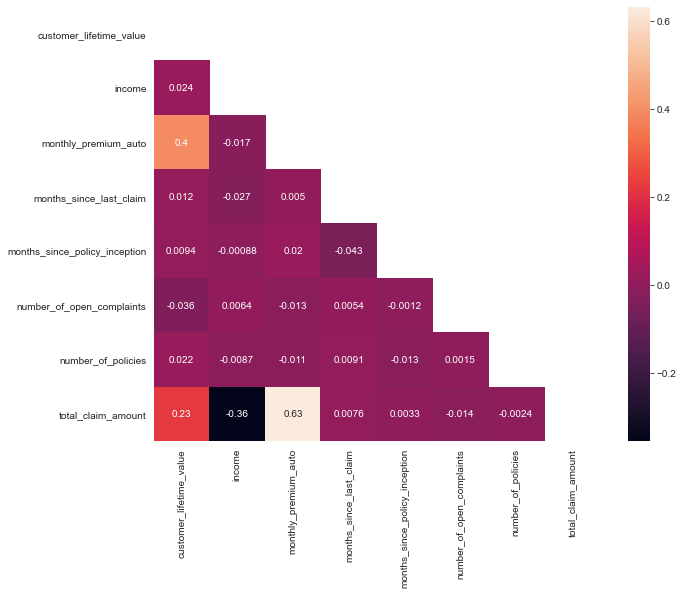

In [27]:
#(half) correlation matrix for ALL numerical variables
corr_data_P = customer_df.corr()
mask = np.triu(np.ones_like(corr_data_P, dtype=bool))
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_data_P, mask=mask, annot=True)
plt.show()

## Create a function to plot every discrete variables. Do the same with continuous variables. 

Be careful, you may change the plot type to another one better suited for continuous data.

In [28]:
def distplot_df(df):
    
    cols = list(df.columns)
    
    for col in cols:
        sns.distplot(df[col])
        plt.show()

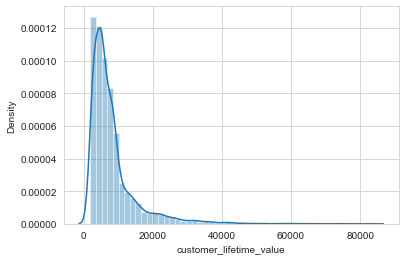

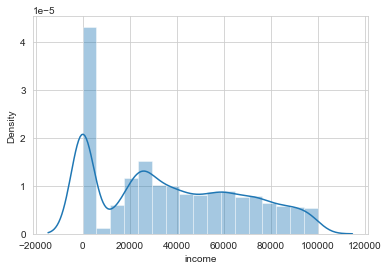

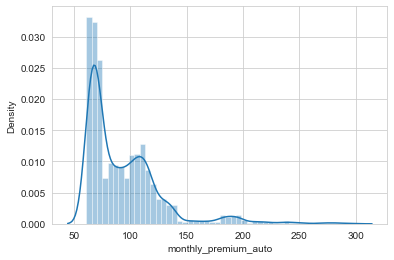

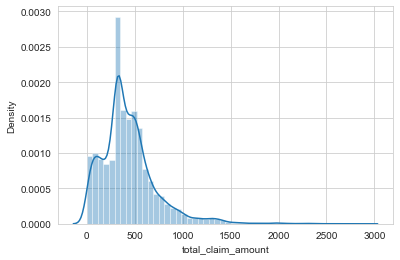

In [29]:
distplot_df(df_cont)

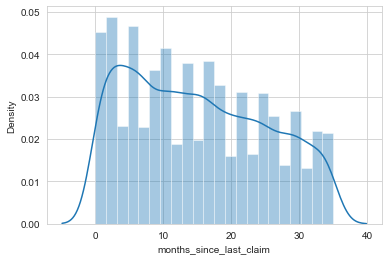

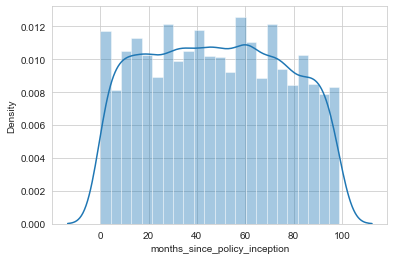

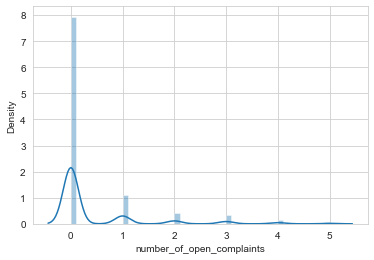

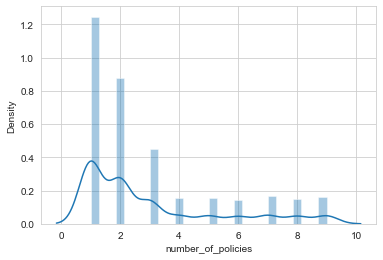

In [30]:
distplot_df(df_discr)

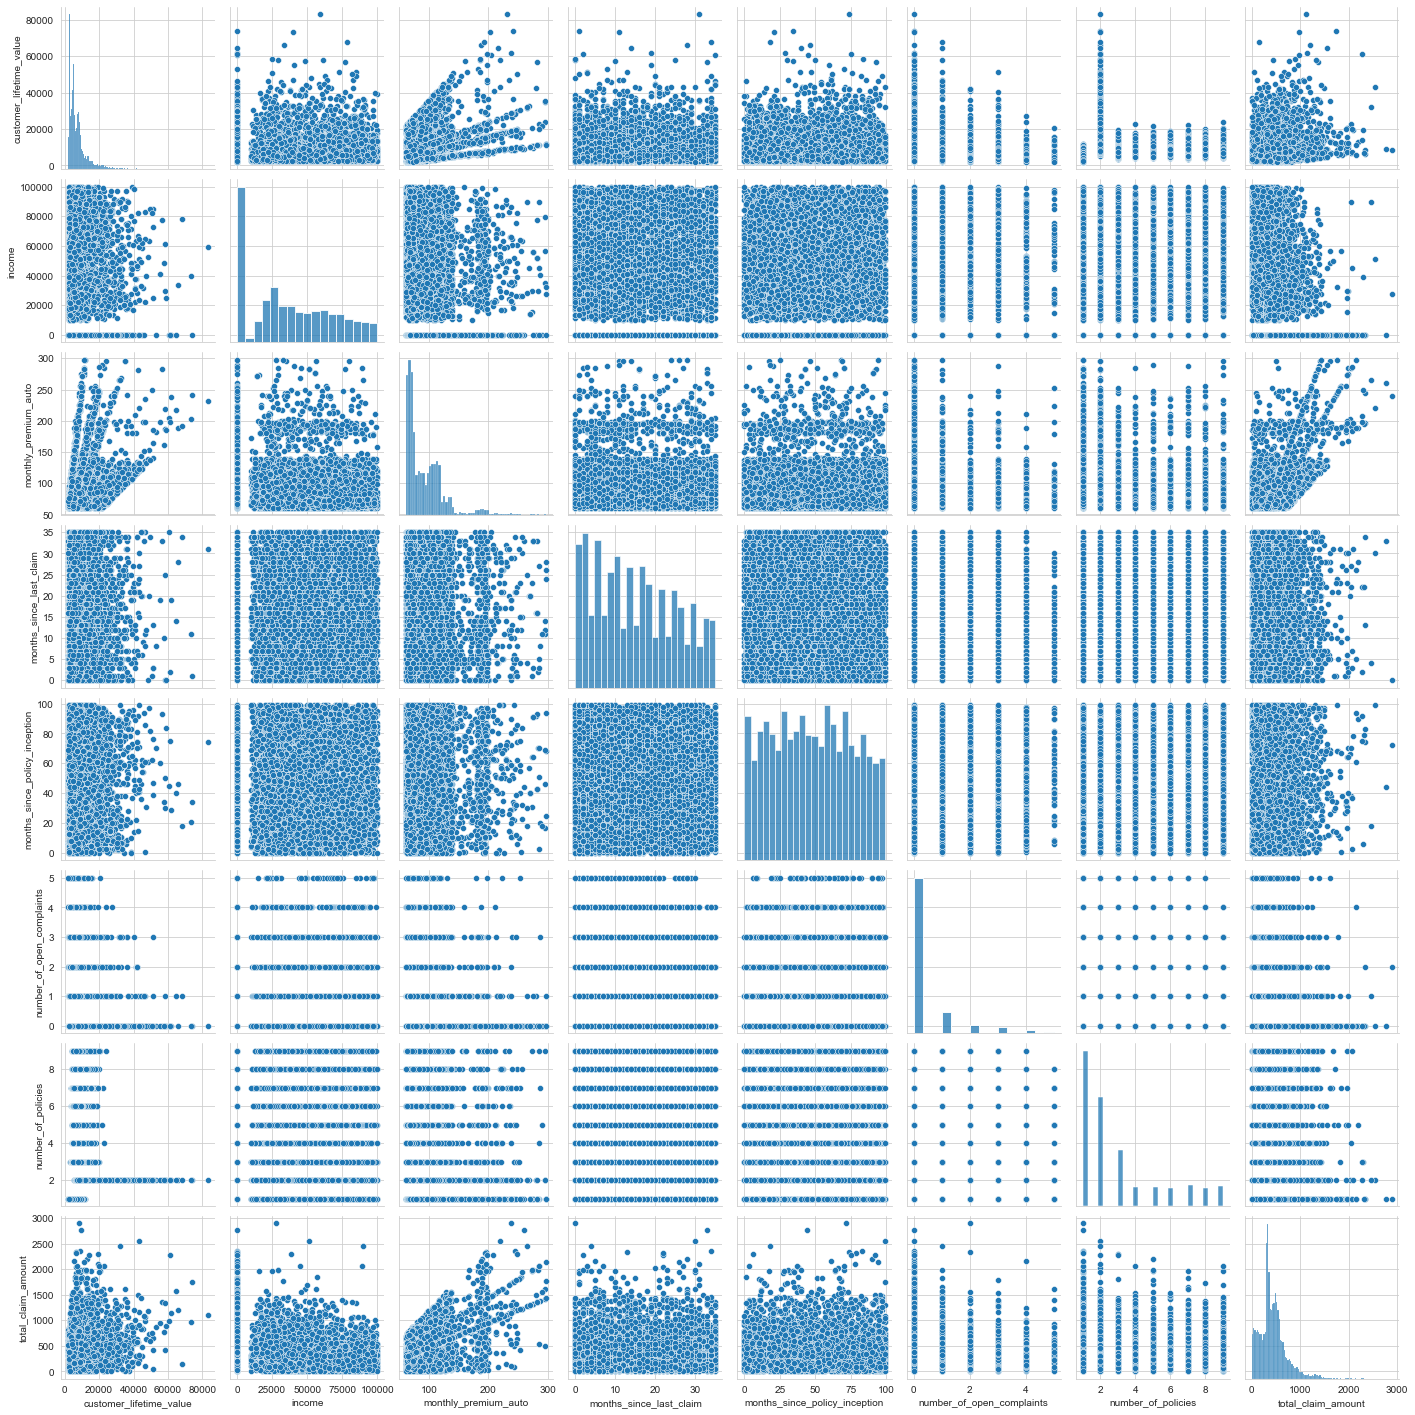

In [31]:
#pairplot for all numerical variables
sns.pairplot(customer_df)

## What can you see in the plots?

    1. "customer_lifetime_value" and "monthly_premium_auto" have very long tails to the right (=many outliers)
    2. "income" has many of 0 incomes

## Look for outliers in the continuous variables we have found. 
Hint: There was a good plot to do that.

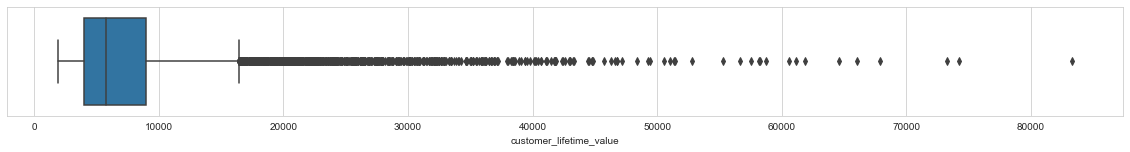

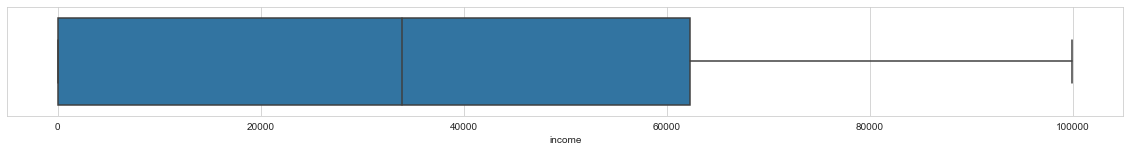

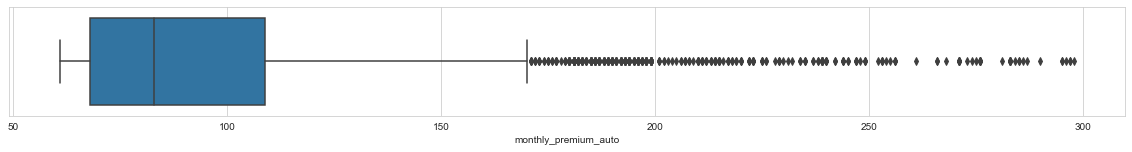

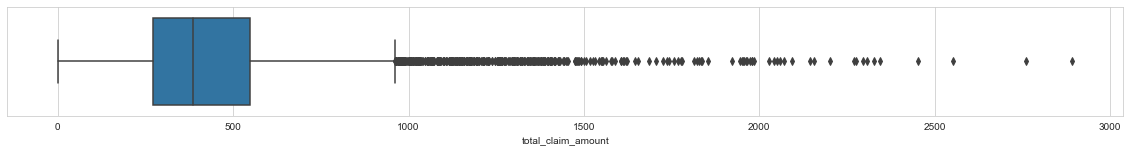

In [32]:
def outliers(df):
    
    for i in df:
        ax, fig = plt.subplots(figsize = (20,2))
        sns.boxplot(x=i, data=df)
        plt.show()
        
    return

outliers(df_cont)

In [33]:
#for i in list(df_cont.columns):
#    ax, fig = plt.subplots(figsize = (20,2))
#    sns.boxplot(x = i, data = df_cont)
#    plt.show()

## Have you found outliers? If you have, what should we do with them?

In [34]:
# log transformation for outliers

def log_transform_clean(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN

In [35]:
df_cont['customer_lifetime_value'] = list(map(log_transform_clean, df_cont['customer_lifetime_value']))
df_cont['monthly_premium_auto'] = list(map(log_transform_clean, df_cont['monthly_premium_auto']))

In [36]:
df_cont.isna().sum()

customer_lifetime_value    0
income                     0
monthly_premium_auto       0
total_claim_amount         0
dtype: int64

In [37]:
def log_transform_clean(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN
#much better but still many outliers for "customer_lifetime_value" and "monthly_premium_auto"

In [38]:
#apply again to see what will change
def log_transform_clean(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN

In [39]:
df_cont['customer_lifetime_value'] = list(map(log_transform_clean, df_cont['customer_lifetime_value']))
df_cont['monthly_premium_auto'] = list(map(log_transform_clean, df_cont['monthly_premium_auto']))

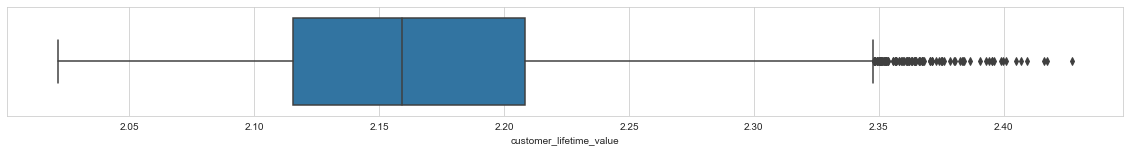

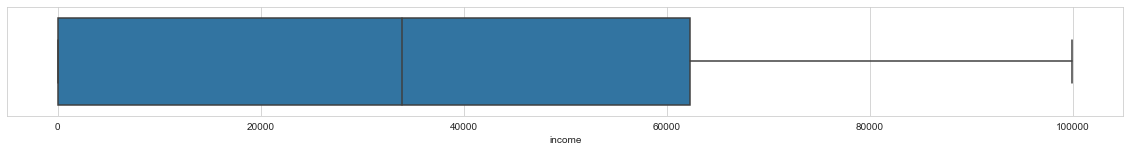

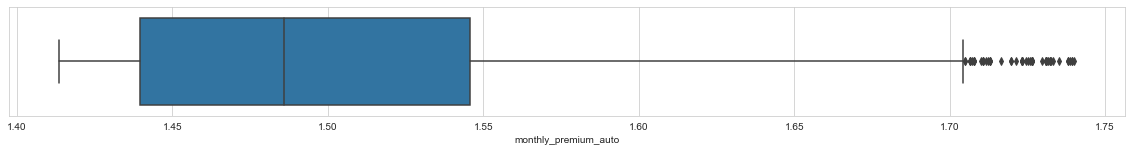

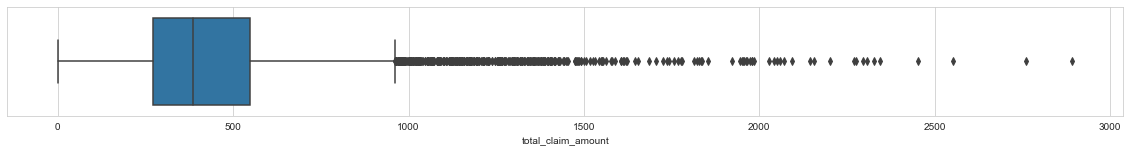

In [40]:
outliers(df_cont)

# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.
Instructions

    Open the categoricals variable we created before.

categoricals = data.select_dtypes(np.object)
categoricals.head()

    1 Plot all the categorical variables with the proper plot. What can you see?
    2 There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
    3 Plot time variable. Can you extract something from it?


In [41]:
categoricals = customer_df.select_dtypes(np.object)
categoricals.head()

state response  coverage education employment_status gender  \
customer_id                                                                     
BU79786      Washington       No     Basic  Bachelor          Employed      F   
QZ44356         Arizona       No  Extended  Bachelor        Unemployed      F   
AI49188          Nevada       No   Premium  Bachelor          Employed      F   
WW63253      California       No     Basic  Bachelor        Unemployed      M   
HB64268      Washington       No     Basic  Bachelor          Employed      M   

            location_code marital_status     policy_type        policy  \
customer_id                                                              
BU79786          Suburban        Married  Corporate Auto  Corporate L3   
QZ44356          Suburban         Single   Personal Auto   Personal L3   
AI49188          Suburban        Married   Personal Auto   Personal L3   
WW63253          Suburban        Married  Corporate Auto  Corporate L2   
HB64268             Rural         Single   Personal Auto   Personal L1   

            renew_offer_type sales_channel  vehicle_class vehicle_size  
customer_id                                                             
BU79786               Offer1         Agent   Two-Door Car      Medsize  
QZ44356               Offer3         Agent  Four-Door Car      Medsize  
AI49188               Offer1         Agent   Two-Door Car      Medsize  
WW63253               Offer1   Call Center            SUV      Medsize  
HB64268               Offer1         Agent  Four-Door Car      Medsize

## Plot all the categorical variables with the proper plot. 
What can you see?

In [42]:
for i in categoricals:
    print('Catagory: ', i)
    print(categoricals[i].value_counts())
    print('\n')

Catagory:  state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64


Catagory:  response
No     7826
Yes    1308
Name: response, dtype: int64


Catagory:  coverage
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64


Catagory:  education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64


Catagory:  employment_status
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64


Catagory:  gender
F    4658
M    4476
Name: gender, dtype: int64


Catagory:  location_code
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64


Catagory:  marital_status
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64


Catagory:  po

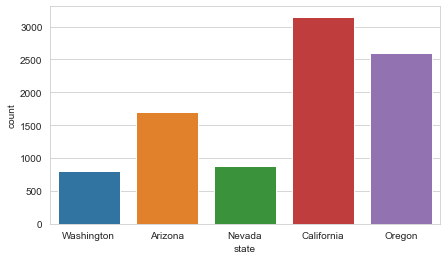

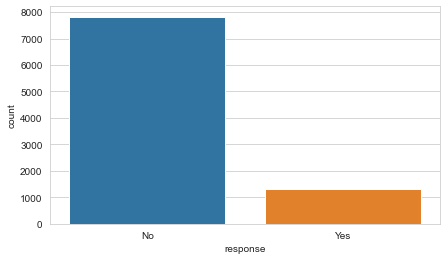

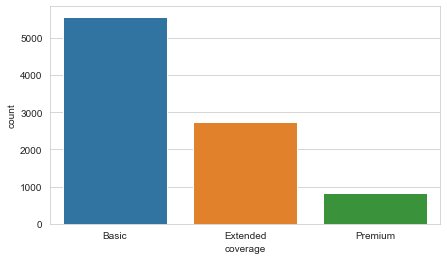

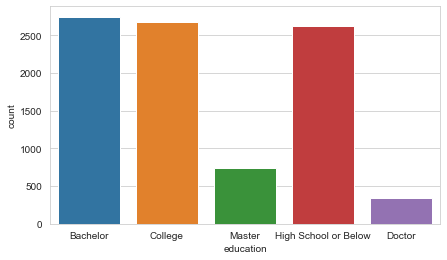

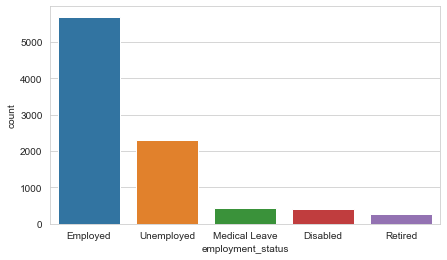

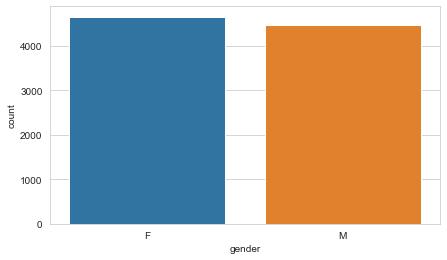

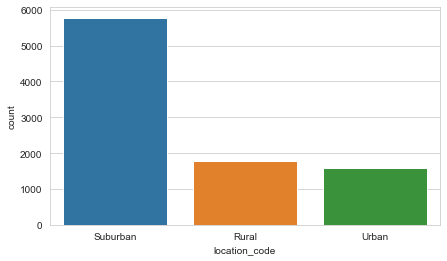

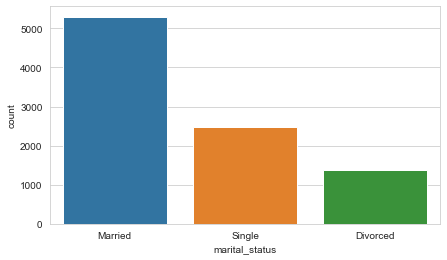

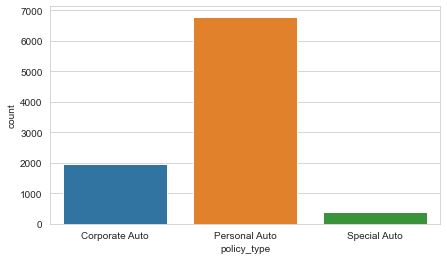

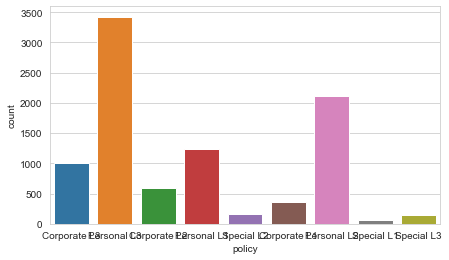

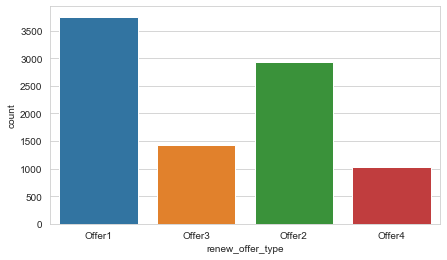

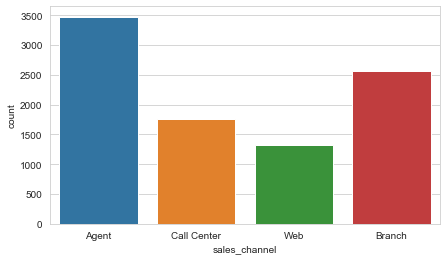

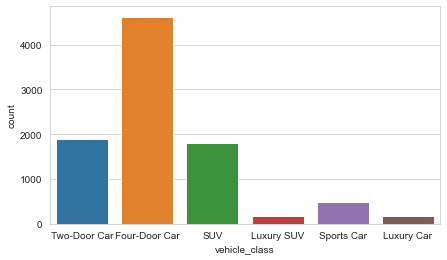

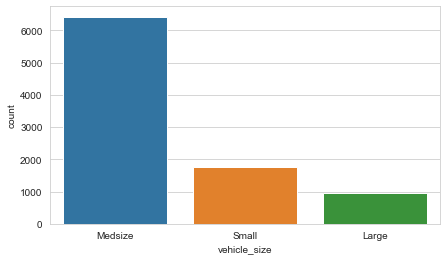

In [43]:
for i in categoricals:
    ax, fig = plt.subplots(figsize = (7,4))
    sns.countplot(x=i, data=categoricals)
    plt.show()

>in some cases it could be good to group some features (e.g. employment_status)

## There might be some columns that seem to be redundant. 
Check their values to be sure. What should we do with them?

In [44]:
#drop policy because it's similar to column policy_type

customer_df = customer_df.drop(['policy'], axis = 1)

## Plot time variable. 
Can you extract something from it?

In [45]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          9134 non-null   object        
 1   customer_lifetime_value        9134 non-null   float64       
 2   response                       9134 non-null   object        
 3   coverage                       9134 non-null   object        
 4   education                      9134 non-null   object        
 5   effective_to_date              9134 non-null   datetime64[ns]
 6   employment_status              9134 non-null   object        
 7   gender                         9134 non-null   object        
 8   income                         9134 non-null   float64       
 9   location_code                  9134 non-null   object        
 10  marital_status                 9134 non-null   object        
 11  monthly_premi

In [46]:
#customer_df['week'] = customer_df['effective_to_date'].apply(lambda x: x.week)
#customer_df['week'].unique()

In [47]:
#convert datetime to timestamp (because it's easier to handle)
customer_df['effective_to_date'] = customer_df['effective_to_date'].apply(pd.Timestamp)

In [48]:
customer_df['effective_to_date'].unique

<bound method Series.unique of customer_id
BU79786   2011-02-24
QZ44356   2011-01-31
AI49188   2011-02-19
WW63253   2011-01-20
HB64268   2011-02-03
             ...    
LA72316   2011-02-10
PK87824   2011-02-12
TD14365   2011-02-06
UP19263   2011-02-03
Y167826   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]>

In [49]:
#n, bins, patches = plt.hist(x = data['week'], bins = 'auto', color = '#0504aa', alpha = )

#plt.grid(axis = 'y', alpha = 0.75)
#plt.xlabel('effective_to_date')
#plt.ylabe('count')
#plt.title('plot_title')

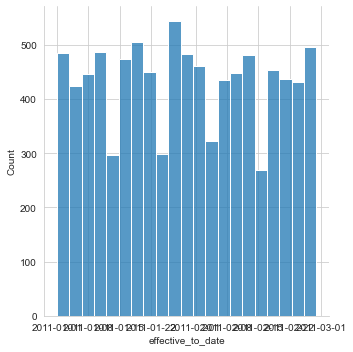

In [50]:
sns.displot(customer_df['effective_to_date'])
plt.show()

# Lab | Data cleaning and wrangling

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.
Instructions

So far we have worked on EDA. This lab will focus on data cleaning and wrangling from everything we noticed before.

    1 We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.
    2 Create a copy of the dataframe for the data wrangling.
    Normalize the continuous variables. You can use any one method you want.
    3 Encode the categorical variables
    4 The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
    5 Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

Hint for Categorical Variables

    You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):


## We will start with removing outliers. 
So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

see below: log transformation

## Create a copy of the dataframe for the data wrangling.
Normalize the continuous variables. You can use any one method you want.

In [51]:
data_copy = customer_df

In [52]:
def con_dis_classifier (df):
    continuous  = []
    discrete    = []
    cat = []
    
    for col in df.columns:
        if(data_copy[col].dtypes == object): #OBJECTS
            cat.append(str(col))
        else:
            if(data_copy[col].dtypes == np.number): #NUMBERS
                if (len(data_copy[col].unique())) > 202:
                    continuous.append(str(col))
                else:
                    discrete.append(str(col))
            else:
                cat.append(str(col))
            
    return continuous, discrete, cat

In [53]:
continuous, discrete, cat = con_dis_classifier(data_copy)

In [54]:
continuous_data  = data_copy[continuous]
discrete_data    = data_copy[discrete]
categorical_data = data_copy[cat]

In [55]:
continuous_data.head()

customer_lifetime_value   income  total_claim_amount
customer_id                                                      
BU79786                  2763.519279  56274.0          384.811147
QZ44356                  6979.535903      0.0         1131.464935
AI49188                 12887.431650  48767.0          566.472247
WW63253                  7645.861827      0.0          529.881344
HB64268                  2813.692575  43836.0          138.130879

In [56]:
discrete_data.head()

monthly_premium_auto
customer_id                      
BU79786                      69.0
QZ44356                      94.0
AI49188                     108.0
WW63253                     106.0
HB64268                      73.0

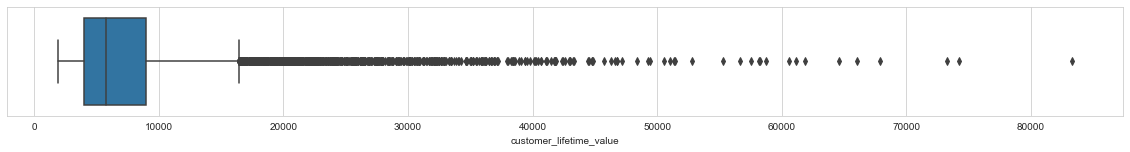

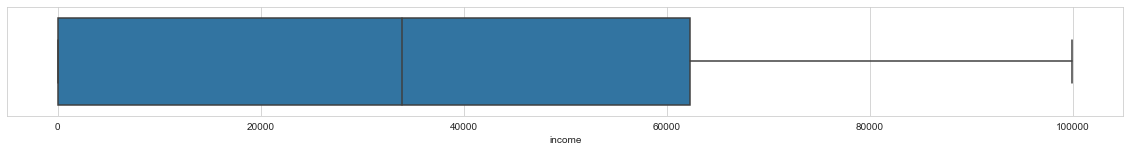

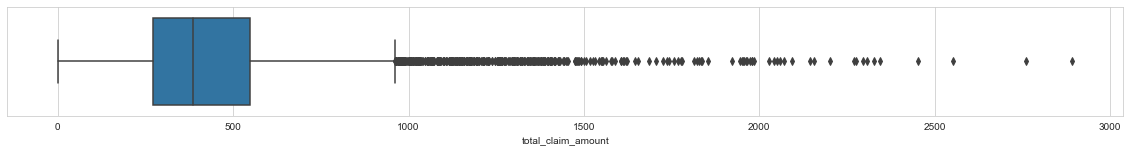

In [57]:
outliers(continuous_data)

In [58]:
#deal with outliers

def log_transform_clean(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN

In [59]:
continuous_data['customer_lifetime_value'] = list(map(log_transform_clean, continuous_data['customer_lifetime_value']))
discrete_data['monthly_premium_auto'] = list(map(log_transform_clean, discrete_data['monthly_premium_auto']))

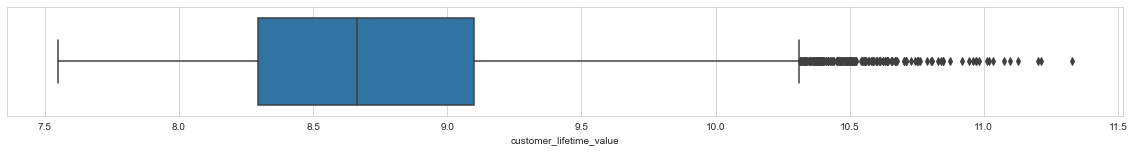

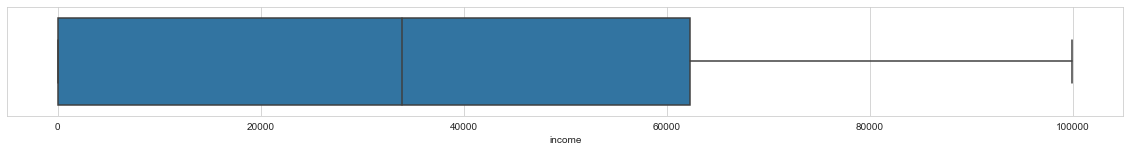

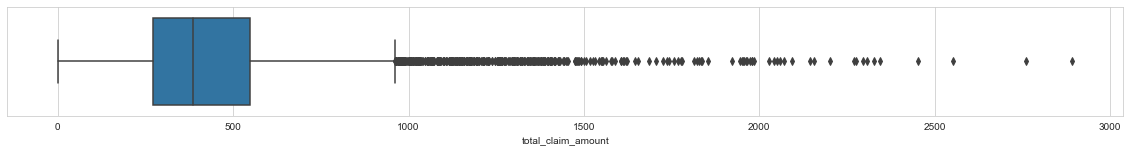

In [60]:
#function from lab 2 (see above)
outliers(continuous_data)

In [61]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(continuous_data)
x_standardized = pd.DataFrame(transformer.transform(continuous_data))
x_standardized

0         1         2
0    -1.262556  0.612827 -0.169640
1     0.156500 -1.239617  2.400737
2     1.095826  0.365710  0.455734
3     0.296160 -1.239617  0.329769
4    -1.234997  0.203390 -1.018843
...        ...       ...       ...
9129  2.009832  1.128558 -0.811934
9130 -1.088297 -0.528450 -0.188956
9131  0.396571 -1.239617  1.227937
9132  0.271642 -0.517356  0.885113
9133 -1.349021 -1.239617 -0.222004

[9134 rows x 3 columns]

In [62]:
x_standardized.columns = continuous_data.columns
x_standardized.columns

Index(['customer_lifetime_value', 'income', 'total_claim_amount'], dtype='object')

## Encode the categorical variables.

In [63]:
#encode ordinals manually:

categorical_data["coverage"] = categorical_data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
categorical_data["vehicle_size"] = categorical_data["vehicle_size"].map({"Medsize" : 1, "Small" : 0, "Large" : 2})
categorical_data["vehicle_class"] = categorical_data["vehicle_class"].map({"Two-Door Car" : 0, "Four-Door Car" : 1, "Sports Car" : 2, "SUV" : 3, "Luxury Car" : 4, "Luxury SUV" : 5})
categorical_data["education"] = categorical_data["education"].map({"High School or Below" : 0, "College" : 1, "Bachelor" : 2, "Master" : 3, "Doctor" : 4})
categorical_data["renew_offer_type"] = categorical_data["renew_offer_type"].map({"Offer1" : 0, "Offer2" : 1, "Offer3" : 2, "Offer4" : 3})

In [64]:
#group manually:
categorical_data["employment_status"] = categorical_data["employment_status"].map({"Unemployed" : 0, "Medical Leave" : 0, "Employed" : 1,"Disabled":0,"Retierd":0})

In [65]:
categorical_data.head()

state response  coverage  education effective_to_date  \
customer_id                                                               
BU79786      Washington       No         0          2        2011-02-24   
QZ44356         Arizona       No         1          2        2011-01-31   
AI49188          Nevada       No         2          2        2011-02-19   
WW63253      California       No         0          2        2011-01-20   
HB64268      Washington       No         0          2        2011-02-03   

             employment_status gender location_code marital_status  \
customer_id                                                          
BU79786                    1.0      F      Suburban        Married   
QZ44356                    0.0      F      Suburban         Single   
AI49188                    1.0      F      Suburban        Married   
WW63253                    0.0      M      Suburban        Married   
HB64268                    1.0      M         Rural         Single   

             months_since_last_claim  months_since_policy_inception  \
customer_id                                                           
BU79786                           32                              5   
QZ44356                           13                             42   
AI49188                           18                             38   
WW63253                           18                             65   
HB64268                           12                             44   

             number_of_open_complaints  number_of_policies     policy_type  \
customer_id                                                                  
BU79786                              0                   1  Corporate Auto   
QZ44356                              0                   8   Personal Auto   
AI49188                              0                   2   Personal Auto   
WW63253                              0                   7  Corporate Auto   
HB64268                              0                   1   Personal Auto   

             renew_offer_type sales_channel  vehicle_class  vehicle_size  
customer_id                                                               
BU79786                     0         Agent              0             1  
QZ44356                     2         Agent              1             1  
AI49188                     0         Agent              0             1  
WW63253                     0   Call Center              3             1  
HB64268                     0         Agent              1             1

In [66]:
to_encode = ["state", "response", "gender", "location_code", "marital_status", "policy_type", "sales_channel"]

In [67]:
def dummies(data, column):
    bp_dummies = pd.get_dummies(data[column])
    data = pd.concat([data, bp_dummies], axis = 1)
    data.drop([column], axis = 1, inplace = True)
    return data

In [68]:
for dummy in to_encode:
       categorical_data = dummies(categorical_data, dummy)

In [69]:
categorical_data.head()

coverage  education effective_to_date  employment_status  \
customer_id                                                             
BU79786             0          2        2011-02-24                1.0   
QZ44356             1          2        2011-01-31                0.0   
AI49188             2          2        2011-02-19                1.0   
WW63253             0          2        2011-01-20                0.0   
HB64268             0          2        2011-02-03                1.0   

             months_since_last_claim  months_since_policy_inception  \
customer_id                                                           
BU79786                           32                              5   
QZ44356                           13                             42   
AI49188                           18                             38   
WW63253                           18                             65   
HB64268                           12                             44   

             number_of_open_complaints  number_of_policies  renew_offer_type  \
customer_id                                                                    
BU79786                              0                   1                 0   
QZ44356                              0                   8                 2   
AI49188                              0                   2                 0   
WW63253                              0                   7                 0   
HB64268                              0                   1                 0   

             vehicle_class  vehicle_size  Arizona  California  Nevada  Oregon  \
customer_id                                                                     
BU79786                  0             1        0           0       0       0   
QZ44356                  1             1        1           0       0       0   
AI49188                  0             1        0           0       1       0   
WW63253                  3             1        0           1       0       0   
HB64268                  1             1        0           0       0       0   

             Washington  No  Yes  F  M  Rural  Suburban  Urban  Divorced  \
customer_id                                                                
BU79786               1   1    0  1  0      0         1      0         0   
QZ44356               0   1    0  1  0      0         1      0         0   
AI49188               0   1    0  1  0      0         1      0         0   
WW63253               0   1    0  0  1      0         1      0         0   
HB64268               1   1    0  0  1      1         0      0         0   

             Married  Single  Corporate Auto  Personal Auto  Special Auto  \
customer_id                                                                 
BU79786            1       0               1              0             0   
QZ44356            0       1               0              1             0   
AI49188            1       0               0              1             0   
WW63253            1       0               1              0             0   
HB64268            0       1               0              1             0   

             Agent  Branch  Call Center  Web  
customer_id                                   
BU79786          1       0            0    0  
QZ44356          1       0            0    0  
AI49188          1       0            0    0  
WW63253          0       0            1    0  
HB64268          1       0            0    0

In [70]:
categorical_data.shape

(9134, 33)

## The time variable can be useful. 
Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [71]:
categorical_data['effective_to_date'].apply(lambda x: x.toordinal())

customer_id
BU79786    734192
QZ44356    734168
AI49188    734187
WW63253    734157
HB64268    734171
            ...  
LA72316    734178
PK87824    734180
TD14365    734174
UP19263    734171
Y167826    734182
Name: effective_to_date, Length: 9134, dtype: int64

## Since the model will only accept numerical data...
...check and make sure that every column is numerical, if some are not, change it using encoding.

In [72]:
clean_data = pd.concat([categorical_data, discrete_data, continuous_data], axis = 1)

In [73]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   coverage                       9134 non-null   int64         
 1   education                      9134 non-null   int64         
 2   effective_to_date              9134 non-null   datetime64[ns]
 3   employment_status              8852 non-null   float64       
 4   months_since_last_claim        9134 non-null   int64         
 5   months_since_policy_inception  9134 non-null   int64         
 6   number_of_open_complaints      9134 non-null   int64         
 7   number_of_policies             9134 non-null   int64         
 8   renew_offer_type               9134 non-null   int64         
 9   vehicle_class                  9134 non-null   int64         
 10  vehicle_size                   9134 non-null   int64         
 11  Arizona      